# DTOcean Installation Module Test

In [1]:
%matplotlib inline

In [2]:
from IPython.display import display, HTML

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14.0, 8.0)

In [4]:
import numpy as np

In [5]:
from dtocean_core import start_logging
from dtocean_core.core import Core
from dtocean_core.menu import ModuleMenu, ProjectMenu
from dtocean_core.pipeline import Tree

In [6]:
def html_list(x):
    message = "<ul>"
    for name in x:
        message += "<li>{}</li>".format(name)
    message += "</ul>"
    return message
def html_dict(x):
    message = "<ul>"
    for name, status in x.iteritems():
        message += "<li>{}: <b>{}</b></li>".format(name, status)
    message += "</ul>"
    return message

In [7]:
# Bring up the logger
start_logging()

2016-11-14 12:34:35,694 - INFO - dtocean_core - Begin logging for dtocean_core.


## Create the core, menus and pipeline tree

The core object carrys all the system information and is operated on by the other classes

In [8]:
new_core = Core()
project_menu = ProjectMenu()
module_menu = ModuleMenu()
pipe_tree = Tree()

## Create a new project

In [9]:
project_title = "DTOcean"  
new_project = project_menu.new_project(new_core, project_title)

2016-11-14 12:34:40,608 - INFO - aneris.entity.simulation - Created new Simulation with title "Default"
2016-11-14 12:34:40,608 - INFO - aneris.control.simulation - Datastate with level "initial" stored
2016-11-14 12:34:40,608 - INFO - aneris.control.pipeline - New Hub created for interface ProjectInterface.


## Set the device type

In [10]:
options_branch = pipe_tree.get_branch(new_core, new_project, "System Type Selection")
variable_id = "device.system_type"
my_var = options_branch.get_input_variable(new_core, new_project, variable_id)
my_var.set_raw_interface(new_core, "Tidal Floating")
my_var.read(new_core, new_project)

2016-11-14 12:34:40,641 - INFO - aneris.control.data - New "device.system_type" data stored with index EB1ZP7
2016-11-14 12:34:40,641 - INFO - aneris.control.simulation - Datastate stored


## Initiate the pipeline
This step will be important when the database is incorporated into the system as it will effect the operation of the pipeline.

In [11]:
project_menu.initiate_pipeline(new_core, new_project)

2016-11-14 12:34:40,655 - INFO - aneris.control.simulation - Datastate with level "system type selection start" stored
2016-11-14 12:34:40,671 - INFO - aneris.control.data - New "hidden.pipeline_active" data stored with index JEZV93
2016-11-14 12:34:40,671 - INFO - aneris.control.simulation - Datastate with level "system type selection output" stored
2016-11-14 12:34:40,671 - INFO - aneris.control.pipeline - New Pipeline created for interface ModuleInterface.
2016-11-14 12:34:40,687 - INFO - aneris.control.pipeline - New Hub created for interface ThemeInterface.


## Discover available modules

In [12]:
names = module_menu.get_available(new_core, new_project)
message = html_list(names)
HTML(message)

## Activate a module

Note that the order of activation is important and that we can't deactivate yet!

In [13]:
module_name = 'Installation'
module_menu.activate(new_core, new_project, module_name)

## Check the status of the module inputs

In [14]:
installation_branch = pipe_tree.get_branch(new_core, new_project, 'Installation')
input_status = installation_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Initiate the dataflow
This indicates that the filtering and module / theme selections are complete

In [15]:
project_menu.initiate_dataflow(new_core, new_project)

2016-11-14 12:34:40,733 - INFO - aneris.control.data - New "hidden.dataflow_active" data stored with index X5GWRA
2016-11-14 12:34:40,733 - INFO - aneris.control.simulation - Datastate stored
2016-11-14 12:34:40,750 - INFO - aneris.control.simulation - Datastate with level "modules initial" stored


## Load test data

Prepare the test data for loading. The files required can be found in the test_data directory of the source code and should be copied to the directory that the notebook is running. When the python file is run a pickle file is generated containing a dictionary of inputs.

In [16]:
%run inputs_wp5_moorings_aegir.py

generate test data: D:\Usuarios\108630\Programming\Python\notebooks\inputs_wp5_moorings_aegir.pkl


In [17]:
installation_branch.read_test_data(new_core,
                                    new_project,
                                    "inputs_wp5_moorings_aegir.pkl")

2016-11-14 12:35:05,023 - INFO - aneris.control.data - New "device.bollard_pull" data stored with index GNC7UX
2016-11-14 12:35:05,023 - INFO - aneris.control.data - New "device.transportation_method" data stored with index BD9O25
2016-11-14 12:35:05,023 - INFO - aneris.control.data - New "device.installation_limit_Ws" data stored with index MTOXI5
2016-11-14 12:35:05,039 - INFO - aneris.control.data - New "component.rov" data stored with index CU276J
2016-11-14 12:35:05,039 - INFO - aneris.control.data - New "farm.comissioning_time" data stored with index 90IM9O
2016-11-14 12:35:05,273 - INFO - aneris.control.data - New "farm.wind_series_installation" data stored with index A6313P
2016-11-14 12:35:05,273 - INFO - aneris.control.data - New "device.disconnect_duration" data stored with index S5Y9RP
2016-11-14 12:35:05,273 - INFO - aneris.control.data - New "component.ports" data stored with index RNUHGV
2016-11-14 12:35:05,273 - INFO - aneris.control.data - New "component.split_pipe_saf

## Check if the module can be executed

In [18]:
can_execute = module_menu.is_executable(new_core, new_project, module_name)
display(can_execute)

True

In [19]:
input_status = installation_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Execute the current module

The "current" module refers to the next module to be executed in the chain (pipeline) of modules. This command will only execute that module and another will be used for executing all of the modules at once.

Note, any data supplied by the module will be automatically copied into the active data state.

In [20]:
module_menu.execute_current(new_core, new_project)

2016-11-14 12:35:05,927 - INFO - aneris.control.simulation - Datastate with level "installation start" stored


C:\Anaconda2\envs\_integration\lib\site-packages\dtocean_logistics-0.2.1.dev0-py2.7.egg\dtocean_logistics\phases\install\Driven.py:123: UserWarning: Hammering technique inadequate for site soil types!
  wn.warn('Hammering technique inadequate for site soil types!')
C:\Anaconda2\envs\_integration\lib\site-packages\dtocean_logistics-0.2.1.dev0-py2.7.egg\dtocean_logistics\phases\install\Driven.py:171: UserWarning: Vibro-Piling technique inadequate for site soil types!
  wn.warn('Vibro-Piling technique inadequate for site soil types!')
C:\Anaconda2\envs\_integration\lib\site-packages\dtocean_logistics-0.2.1.dev0-py2.7.egg\dtocean_logistics\performance\economic\eco.py:138: UserWarning: Lack of information on vessel fuel consumption, fuel cost not considered!
  wn.warn('Lack of information on vessel fuel consumption, fuel cost not considered!')


2016-11-14 12:35:12,246 - INFO - aneris.control.data - New "farm.installation_economics_data" data stored with index N9KLOX
2016-11-14 12:35:12,246 - INFO - aneris.control.data - New "project.end_date" data stored with index 0LO2V1
2016-11-14 12:35:12,246 - INFO - aneris.control.data - New "farm.port" data stored with index RPEGWM
2016-11-14 12:35:12,246 - INFO - aneris.control.data - New "farm.port_distance" data stored with index KIQXG6
2016-11-14 12:35:12,246 - INFO - aneris.control.data - New "farm.total_installation_time" data stored with index X0WC1P
2016-11-14 12:35:12,246 - INFO - aneris.control.data - New "farm.installation_waiting_time" data stored with index QOWAFK
2016-11-14 12:35:12,246 - INFO - aneris.control.data - New "farm.installation_preparation_time" data stored with index 5DBFAS
2016-11-14 12:35:12,262 - INFO - aneris.control.data - New "farm.installation_sea_transit_time" data stored with index 9JNA33
2016-11-14 12:35:12,262 - INFO - aneris.control.data - New "far

## Examine the results

In [21]:
output_status = installation_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

In [22]:
farm_annual_energy = new_core.get_data_value(new_project, "farm.installation_economics_data")
meta = new_core.get_metadata("farm.installation_economics_data")
name = meta.title
value = farm_annual_energy
units = meta.units[0]
message = "<p><b>{}:</b> <i>{}</i> ({})</p>".format(name, value, units)

HTML(message)

In [23]:
number_of_journeys = new_core.get_data_value(new_project, "farm.installation_journeys")
number_of_journeys

6

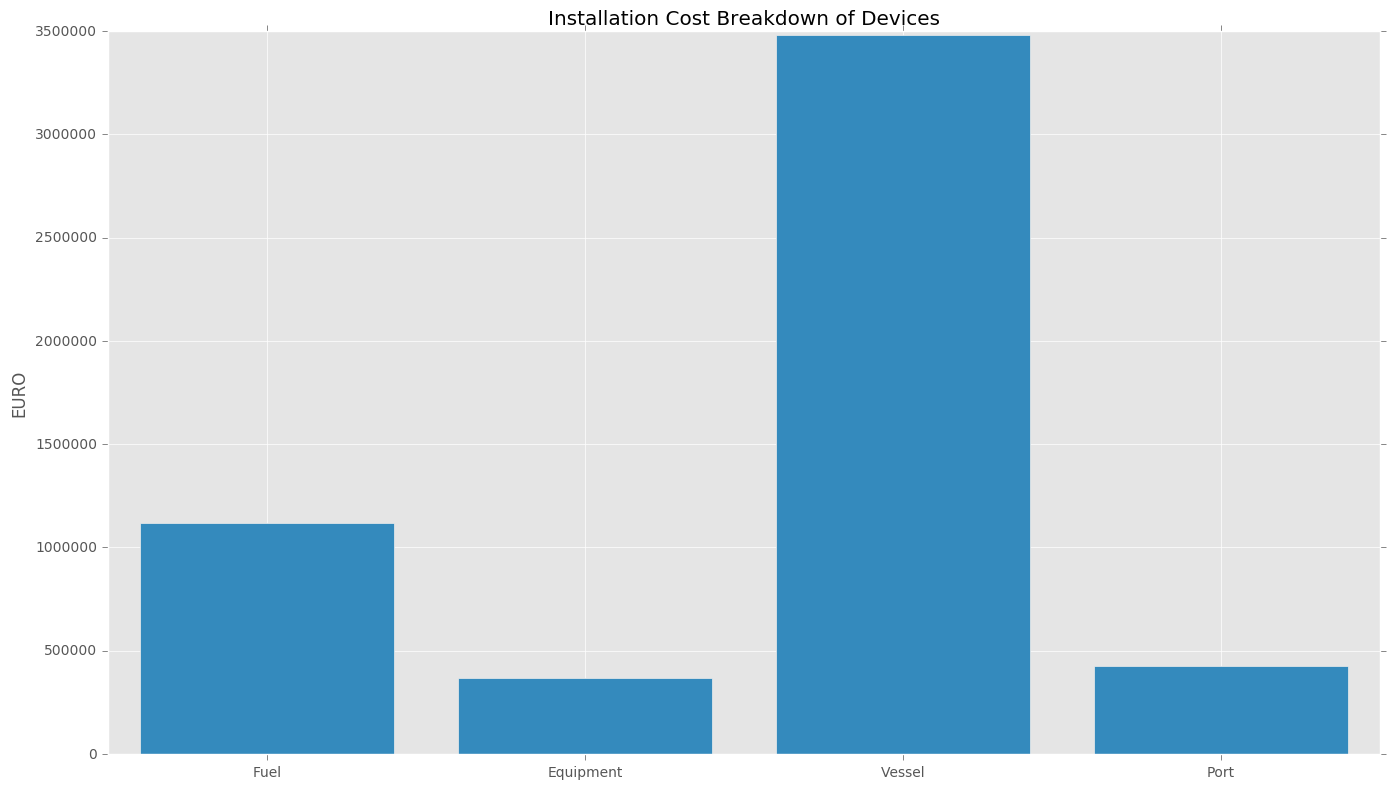

In [24]:
f = installation_branch.get_output_variable(new_core, new_project, "farm.install_device_cost")
f.plot(new_core,new_project)

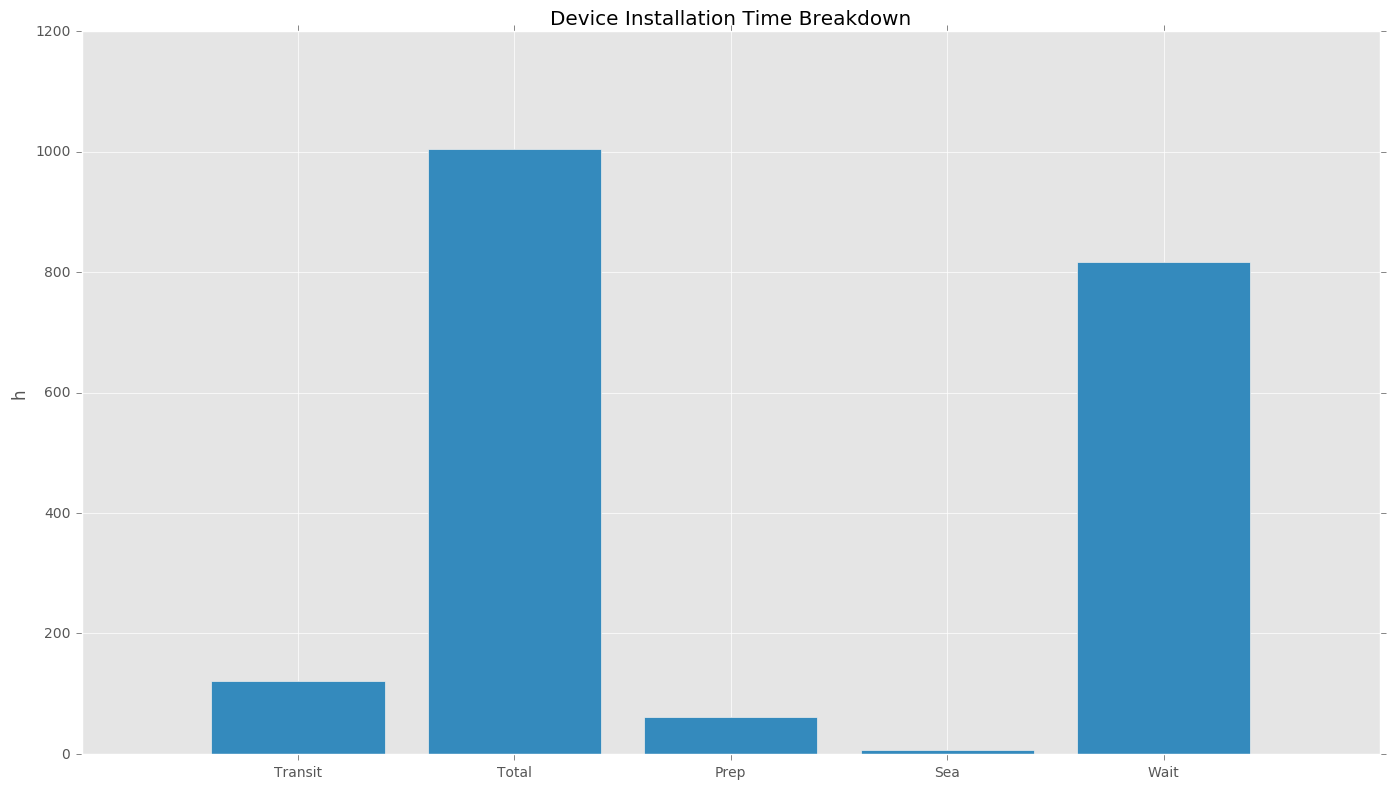

In [25]:
f = installation_branch.get_output_variable(new_core, new_project, "farm.install_device_time")
f.plot(new_core,new_project)

In [26]:
economics_data_breakdown = new_core.get_data_value(new_project, "farm.installation_economics_data_breakdown")
economics_data_breakdown

{'Equipment': 897105.9720450835,
 'Port': 757467.9913886355,
 'Vessel': 5920105.950452635}

In [27]:
pile_anchor_cost = new_core.get_data_value(new_project, "farm.install_pile_anchor_cost")
pile_anchor_cost

{'Equipment': 33311.17125218845,
 'Fuel': 79734.18650789789,
 'Port': 25357.440054857405,
 'Vessel': 194905.78924152817}